In [1]:
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers, models, datasets, utils, optimizers

import mlflow

2022-07-05 12:23:28.684925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-05 12:23:28.684958: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

Text(0.5, 1.0, '7')

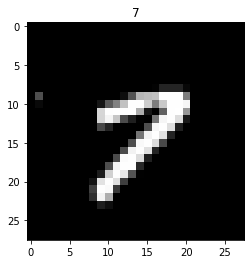

In [3]:
i = 29
plt.imshow(x_train[i], cmap='gray')
plt.title(y_train[i])

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.astype('uint8') / 255
x_test = x_test.astype('uint8') / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [10]:
def rn_treinamento(layers_params, dropout, optimizer, epochs):
    mlflow.set_experiment("rn_exp")
    
    with mlflow.start_run():
        mlflow.tensorflow.autolog()
        
        #registro de tags
        mlflow.set_tag('conv_kernels', layers_params['conv_kernels'])
        mlflow.set_tag('dense_neurons', layers_params['dense_neurons'])
        mlflow.set_tag('dropout', dropout)
        #mlflow.set_tag('', )
        #mlflow.set_tag('', )
        
        model = models.Sequential()
        model.add(layers.Input((None, None, 1)))
        
        for kernels in layers_params['conv_kernels']:
            model.add(layers.Conv2D(kernels, kernel_size=(3, 3), activation='relu', padding="same"))
            model.add(layers.MaxPool2D(pool_size=(2, 2)))
        
        model.add(layers.GlobalAveragePooling2D())
        
        for neurons in layers_params['dense_neurons']:
            model.add(layers.Dense(neurons, activation='relu'))
            model.add(layers.Dropout(dropout))#

        #model.add(layers.Dropout(dropout))
        model.add(layers.Dense(10, activation='softmax'))
        
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
        model.summary()
        
        history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)
        
        # gerar graficos
        loss = plt.plot(history.history['val_loss'], label='loss')
        loss = plt.plot(history.history['val_acc'], label='acc')
        plt.legend()
        plt.savefig('loss_acc.png')
        
        
        #registro de graficos
        mlflow.log_artifact('./loss_acc.png')
        plt.clf()
        
        #informações de execução
        print("Modelo:", mlflow.active_run().info.run_uuid)
        
    mlflow.end_run()

In [11]:
layers_params_list = [{'conv_kernels': [16], 'dense_neurons': [16]},
                      {'conv_kernels': [16, 32], 'dense_neurons': [32]},
                      {'conv_kernels': [16, 32, 64], 'dense_neurons': [64]},
                      {'conv_kernels': [16, 32, 64], 'dense_neurons': [64, 32]},
                      {'conv_kernels': [16, 32, 64, 128], 'dense_neurons': [128]},
                      {'conv_kernels': [16, 32, 64, 128], 'dense_neurons': [128, 64]},
                      {'conv_kernels': [16, 32, 64, 128], 'dense_neurons': [128, 64, 32]}]
dropout_list = [0.1, 0.2]
epochs_list = [5, 10, 15, 20]
optimizer_list = ['RMSprop', 'Adam']
for layers_params in layers_params_list:
    for dropout in dropout_list:
        for epochs in epochs_list:
            for optimizer in optimizer_list:
                rn_treinamento(layers_params=layers_params, dropout=dropout, epochs=epochs, optimizer=optimizer)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_16  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_32 (Dense)            (None, 16)                272       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_33 (Dense)            (None, 10)              

INFO:tensorflow:Assets written to: /tmp/tmp7c96xvmu/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp7c96xvmu/model/data/model/assets


Modelo: dfd079a4ca424039bf1be4cf12852470
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_17  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_35 (D

INFO:tensorflow:Assets written to: /tmp/tmpsbbftqsv/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpsbbftqsv/model/data/model/assets


Modelo: b60c3db749b04e04a8df8dad7211f81e
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_18  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_36 (Dense)            (None, 16)                272       
                                                                 
 dropout_18 (Dropout)        (None, 16)                0         
                                                                 
 dense_37 (D

INFO:tensorflow:Assets written to: /tmp/tmprw02_9gs/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmprw02_9gs/model/data/model/assets


Modelo: d6a854ecbb9c477ba8da41163f22b27e
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_19  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_38 (Dense)            (None, 16)                272       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_39 (D

INFO:tensorflow:Assets written to: /tmp/tmpte9qb2n5/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpte9qb2n5/model/data/model/assets


Modelo: d4eadcc7af85453791452a665e3bb165
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_20  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_40 (Dense)            (None, 16)                272       
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_41 (D

INFO:tensorflow:Assets written to: /tmp/tmp7uqtlfx8/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp7uqtlfx8/model/data/model/assets


Modelo: d7c02c17b3d34a0ead17af714ffb2153
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_21  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_42 (Dense)            (None, 16)                272       
                                                                 
 dropout_21 (Dropout)        (None, 16)                0         
                                                                 
 dense_43 (D

INFO:tensorflow:Assets written to: /tmp/tmpk5dj6vd0/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpk5dj6vd0/model/data/model/assets


Modelo: 45012ce5dc974e0384d7e6831a55f657
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_22  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_44 (Dense)            (None, 16)                272       
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_45 (D

INFO:tensorflow:Assets written to: /tmp/tmppmemrfqj/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmppmemrfqj/model/data/model/assets


Modelo: 8b1972936085463988e718a006a66dc5
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_23  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_46 (Dense)            (None, 16)                272       
                                                                 
 dropout_23 (Dropout)        (None, 16)                0         
                                                                 
 dense_47 (D

INFO:tensorflow:Assets written to: /tmp/tmpnrnvqz4p/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpnrnvqz4p/model/data/model/assets


Modelo: cb4cda10d99b45089f7552f5c2ffb3ac
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_24  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_48 (Dense)            (None, 16)                272       
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_49 (D

INFO:tensorflow:Assets written to: /tmp/tmp49jdrfjm/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp49jdrfjm/model/data/model/assets


Modelo: f7f9a9898369488fa20fd8d5ef4ecc23
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_25  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 16)                272       
                                                                 
 dropout_25 (Dropout)        (None, 16)                0         
                                                                 
 dense_51 (D

INFO:tensorflow:Assets written to: /tmp/tmpyx1fe8hb/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpyx1fe8hb/model/data/model/assets


Modelo: 9660ccb2af4d4f0ebd1c7fa4cc37a3fe
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_26  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_52 (Dense)            (None, 16)                272       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_53 (D

INFO:tensorflow:Assets written to: /tmp/tmp67xmrgr2/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp67xmrgr2/model/data/model/assets


Modelo: ff57d6235e31439b940a2a1c5b076def
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_27  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_54 (Dense)            (None, 16)                272       
                                                                 
 dropout_27 (Dropout)        (None, 16)                0         
                                                                 
 dense_55 (D

INFO:tensorflow:Assets written to: /tmp/tmp3j2e9q2m/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp3j2e9q2m/model/data/model/assets


Modelo: 2594a5ce20b14a21994d4829a70570c3
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_28  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_56 (Dense)            (None, 16)                272       
                                                                 
 dropout_28 (Dropout)        (None, 16)                0         
                                                                 
 dense_57 (D

INFO:tensorflow:Assets written to: /tmp/tmp17vfv_26/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp17vfv_26/model/data/model/assets


Modelo: 9daa14704d1e4fc197f2945494ea091f
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_29  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_58 (Dense)            (None, 16)                272       
                                                                 
 dropout_29 (Dropout)        (None, 16)                0         
                                                                 
 dense_59 (D

INFO:tensorflow:Assets written to: /tmp/tmptvaxm0jc/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmptvaxm0jc/model/data/model/assets


Modelo: d05dc65353054ac8a499b69aeb4b6807
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_30  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_60 (Dense)            (None, 16)                272       
                                                                 
 dropout_30 (Dropout)        (None, 16)                0         
                                                                 
 dense_61 (D

INFO:tensorflow:Assets written to: /tmp/tmp15lav9in/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp15lav9in/model/data/model/assets


Modelo: ce0419241f5f4c76a7af774b8c7f0a56
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_31  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_62 (Dense)            (None, 16)                272       
                                                                 
 dropout_31 (Dropout)        (None, 16)                0         
                                                                 
 dense_63 (D

INFO:tensorflow:Assets written to: /tmp/tmpr9kk09ui/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpr9kk09ui/model/data/model/assets


Modelo: 49e2ae9b99574d138da7a877e43825b1
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_32  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpazdo4zq0/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpazdo4zq0/model/data/model/assets


Modelo: ba32c6238a10457491d2a740c113fd8f
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_33  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmptrl77ie9/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmptrl77ie9/model/data/model/assets


Modelo: f1d4934bb57c43e0bf607ae319360a63
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_34  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpp1t4qybt/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpp1t4qybt/model/data/model/assets


Modelo: 5ff2f683681147a6b17e1bafbefc327b
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_35  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmphzh6275v/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmphzh6275v/model/data/model/assets


Modelo: e9776e5bea0e42de834a497926e7a477
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_36  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpiy6l78xc/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpiy6l78xc/model/data/model/assets


Modelo: a120af4dda474b4fb7469747ce92419e
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_37  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmp0p6g6qwr/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp0p6g6qwr/model/data/model/assets


Modelo: 7fd2f991672f41ea97932c900d8569b0
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_38  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpvcfazzqi/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpvcfazzqi/model/data/model/assets


Modelo: 55eddbac37754c12b02537fd38a6c017
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_39  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpjcpuzx1i/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpjcpuzx1i/model/data/model/assets


Modelo: b94e11df90b64244bb1da6a24c64314a
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_40  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpspoxo62_/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpspoxo62_/model/data/model/assets


Modelo: 10989ac61633422f96038193b2ec0721
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_41  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmptrenh6qb/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmptrenh6qb/model/data/model/assets


Modelo: cf770cf4cc454355a8049e24fb728c3f
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_42  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmp_r9ijr6t/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp_r9ijr6t/model/data/model/assets


Modelo: 79e1041c4dbd49bd91985adda5b8134e
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_43  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpx0t_69v5/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpx0t_69v5/model/data/model/assets


Modelo: bea3327d1602439aa473e7240dac0e5c
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_44  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpmdpn0qmh/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpmdpn0qmh/model/data/model/assets


Modelo: 03fe03d749f84fa4988fb76fc7384888
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_45  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpkmidi34j/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpkmidi34j/model/data/model/assets


Modelo: 39b22a695c8c4d56bd35b5f45f875f5f
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_46  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpd469baq0/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpd469baq0/model/data/model/assets


Modelo: dc540adaea1d4b04a84ff672e6dcbf64
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_47  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
            

INFO:tensorflow:Assets written to: /tmp/tmpdnbcilka/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpdnbcilka/model/data/model/assets


Modelo: 1fe212fd89814a369ebdf90542fb906c
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpdzumq9mn/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpdzumq9mn/model/data/model/assets


Modelo: 83b6d917b1054db8b87188c516606c9f
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmptcxiiayi/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmptcxiiayi/model/data/model/assets


Modelo: 7b433e63645d43d792e5789a69a2b7c8
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp_nqsgowy/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp_nqsgowy/model/data/model/assets


Modelo: 5761921030f94ac7a99216974ac09452
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp2gtx9vyj/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp2gtx9vyj/model/data/model/assets


Modelo: 5ecba1b2f9be4670af540aca85e573d4
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpn3v3roia/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpn3v3roia/model/data/model/assets


Modelo: 03634de03bf54fc2892a5213d631d391
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp4j8rhphj/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp4j8rhphj/model/data/model/assets


Modelo: 241a38a4a96e48dbaf6171887d7429bd
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpg9rupbhw/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpg9rupbhw/model/data/model/assets


Modelo: e441606ee4bc4b0991cbca95f9533732
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp8jswtt9g/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp8jswtt9g/model/data/model/assets


Modelo: ac03a0ca0f7a4ab4b5730d14b9d2a65e
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp6x5dugm3/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp6x5dugm3/model/data/model/assets


Modelo: b540fba28cfd483a9a4b793955a9a1b3
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpnx3qbq49/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpnx3qbq49/model/data/model/assets


Modelo: f511c82fd570496abf31a48618b7f61e
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpypvd7eg6/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpypvd7eg6/model/data/model/assets


Modelo: 9407f20cfa864356903d7f53aa749290
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, None, None, 16)    160       
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, None, None, 16)   0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpxwbvud6h/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpxwbvud6h/model/data/model/assets


Modelo: 0346541b9f7042f2aa5e2efad5469740
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_101 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_101 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_102 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpduz_2ckp/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpduz_2ckp/model/data/model/assets


Modelo: 0ab26c8872054d3094835d23901106f3
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_103 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_104 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_105 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpf8mw_e27/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpf8mw_e27/model/data/model/assets


Modelo: f77940a8158e42f48be29bcc54d0dbf4
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_106 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_107 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_107 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_108 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpq7m7nsgb/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpq7m7nsgb/model/data/model/assets


Modelo: c092d5008417424a82b7989aad1b81d6
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_109 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_110 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_110 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_111 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpc7id12y5/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpc7id12y5/model/data/model/assets


Modelo: 0c767d1996034be38a82f2ab3c8a09a0
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_112 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_113 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_113 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_114 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp8acdn4d_/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp8acdn4d_/model/data/model/assets


Modelo: ec0db2cd4b314cd69c0e09ac9305201e
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_115 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_115 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_116 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_116 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_117 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpdwia665i/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpdwia665i/model/data/model/assets


Modelo: a20e04c3bcaa423b9b50a41137a063b0
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_118 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_118 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_119 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_119 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_120 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp7tclmnor/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp7tclmnor/model/data/model/assets


Modelo: 7acb4b9481074facb2897532a8699594
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_121 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_121 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_122 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_122 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_123 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpvjuwxkuz/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpvjuwxkuz/model/data/model/assets


Modelo: 33f8177c22554a7ea3e1ac049687d2f2
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_124 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_125 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_125 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_126 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpqt0_f8xn/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpqt0_f8xn/model/data/model/assets


Modelo: 03b391dc3d9f4c448cf256bbb7752484
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_127 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_127 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_128 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_128 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_129 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp_zqsxx8u/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp_zqsxx8u/model/data/model/assets


Modelo: faf6513a284244bbba9d1667e072b5d6
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_130 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_130 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_131 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_131 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_132 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpme9zkwdm/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpme9zkwdm/model/data/model/assets


Modelo: 030bd54265204033a3819bb4e243ffa9
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_133 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_133 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_134 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_134 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_135 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp6xc9wfa1/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp6xc9wfa1/model/data/model/assets


Modelo: 82ca398838b3468b805e2660aa9773c7
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_136 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_136 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_137 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_137 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_138 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp6moszmqs/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp6moszmqs/model/data/model/assets


Modelo: a232cc62306440f0902469c8c995d64f
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_139 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_140 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_140 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_141 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpp4ymomz6/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpp4ymomz6/model/data/model/assets


Modelo: 3ef75626a5334eaa8c8d6393fc73615c
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_142 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_142 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_143 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_143 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_144 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpjy_tbftt/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpjy_tbftt/model/data/model/assets


Modelo: 58ad806526a1491c929fac538f0957dc
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_145 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_145 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_146 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_146 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_147 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpbjgkur_5/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpbjgkur_5/model/data/model/assets


Modelo: 1dd0246dc4cd42db9b5e5ff5f5011bc8
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_148 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_148 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_149 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_149 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_150 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpgzpogq5n/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpgzpogq5n/model/data/model/assets


Modelo: c0245f2b5d244cbab9ea344066245a73
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_151 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_151 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_152 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_152 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_153 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpxfqwdhgj/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpxfqwdhgj/model/data/model/assets


Modelo: 25c297b9b1a04249a56619a3654ad5df
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_154 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_154 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_155 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_155 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_156 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpyblt3aw_/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpyblt3aw_/model/data/model/assets


Modelo: 8e5435a2ee6b4d68990d52b95e285b71
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_157 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_157 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_158 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_158 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_159 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmptg88gcrv/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmptg88gcrv/model/data/model/assets


Modelo: bcdacd372fc94844a78a4d2f16e9602f
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_160 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_160 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_161 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_161 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_162 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp_mezq1ga/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp_mezq1ga/model/data/model/assets


Modelo: d7f7a04ba6704183933b397cb2b77c03
Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_164 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_164 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_165 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_165 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_166 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp0jiubobm/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp0jiubobm/model/data/model/assets


Modelo: 5b070bffee8a439baaf1068c9846537e
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_168 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_168 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_169 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_169 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_170 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpczdpf6og/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpczdpf6og/model/data/model/assets


Modelo: 37d334149fb0440bb9fc362ed6b5a271
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_172 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_172 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_173 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_173 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_174 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpjv4sgvv6/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpjv4sgvv6/model/data/model/assets


Modelo: d05ddda49c7c47e5ac84c432f43f7b03
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_176 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_176 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_177 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_177 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_178 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp29fscpr5/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp29fscpr5/model/data/model/assets


Modelo: ca6bd6ef362d4c808715ffc30fa4acd2
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_180 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_180 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_181 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_181 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_182 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpcgafgzy2/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpcgafgzy2/model/data/model/assets


Modelo: 99d82708f27d4da29ace77ca1a054e9e
Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_184 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_184 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_185 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_185 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_186 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpssr2m4iw/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpssr2m4iw/model/data/model/assets


Modelo: 1a1b960ebe0b4a53a9eac21f0a096d6d
Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_188 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_188 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_189 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_189 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_190 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmph02k1k9t/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmph02k1k9t/model/data/model/assets


Modelo: 7570a9922fc64492b494dc72423ed8c8
Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_192 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_193 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_194 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpdmuozo6k/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpdmuozo6k/model/data/model/assets


Modelo: 70ee2173fd584a849ad1e9d5f1172dab
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_196 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_196 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_197 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_197 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_198 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp2gpo41j5/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp2gpo41j5/model/data/model/assets


Modelo: 4d7f89381fb545378b561e1ad1ec9254
Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_200 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_200 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_201 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_201 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_202 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp74h0_4hw/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp74h0_4hw/model/data/model/assets


Modelo: 11cc47ae4c1542908452f450fb7be6d1
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_204 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_204 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_205 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_205 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_206 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpml1e9rff/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpml1e9rff/model/data/model/assets


Modelo: 52e1391eaa9244548ef179cd04cf55c3
Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_208 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_208 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_209 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_209 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_210 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmppxizf51b/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmppxizf51b/model/data/model/assets


Modelo: 8640a4df9a6d42c7a33af6ebfab2bda2
Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_212 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_212 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_213 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_213 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_214 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp3pyj31xh/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp3pyj31xh/model/data/model/assets


Modelo: 867e37c726674b648360bfa44e4486fd
Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_216 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_216 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_217 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_217 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_218 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpwfeqcwrd/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpwfeqcwrd/model/data/model/assets


Modelo: 00013646d4c64d80ae7e4f6f698b3e05
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_220 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_220 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_221 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_221 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_222 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpf33m1b0g/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpf33m1b0g/model/data/model/assets


Modelo: 1db03ef379514184b6c1d21b208ae001
Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_224 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_224 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_225 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_225 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_226 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpkuui7_3y/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpkuui7_3y/model/data/model/assets


Modelo: 5927e8cd6d89496592daa718d9b6e1e0
Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_228 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_228 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_229 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_229 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_230 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmp89tmwjkc/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp89tmwjkc/model/data/model/assets


Modelo: e945b362553d4f49a83e7069c3aa09d0
Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_232 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_232 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_233 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_233 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_234 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpg6uwfyk_/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpg6uwfyk_/model/data/model/assets


Modelo: da26354e08c44eea8b74c61ee3e55073
Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_236 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_236 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_237 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_237 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_238 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_pooling

INFO:tensorflow:Assets written to: /tmp/tmpg77he486/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpg77he486/model/data/model/assets


Modelo: 9ca87fdea36441938cdd057cac7c3fd7
Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_240 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_240 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_241 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_241 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_242 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp57ney8fo/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp57ney8fo/model/data/model/assets


Modelo: 85e734f0d8f740adab68eee1b76cbeca
Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_244 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_244 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_245 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_245 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_246 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpliybabul/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpliybabul/model/data/model/assets


Modelo: 60d211fb1b4d4bd1b1188e55bf2ee399
Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_248 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_248 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_249 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_249 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_250 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpquisquo6/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpquisquo6/model/data/model/assets


Modelo: edb3cb2da3c64e14be03f7d4799c458b
Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_252 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_252 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_253 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_253 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_254 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp0khayztp/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp0khayztp/model/data/model/assets


Modelo: f2c3133a59204772add6141131f6343b
Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_256 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_256 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_257 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_257 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_258 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmprtys3a8d/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmprtys3a8d/model/data/model/assets


Modelo: 5584696f960c473a8dbf559ba5aa15a2
Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_260 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_260 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_261 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_261 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_262 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp18x98da6/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp18x98da6/model/data/model/assets


Modelo: 9ebe762b25114745b993fcf957e2ce83
Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_264 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_264 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_265 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_265 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_266 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpkxx286yf/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpkxx286yf/model/data/model/assets


Modelo: effbf04d8e9e4b119ddad129509ba25d
Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_268 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_268 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_269 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_269 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_270 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpp2vzirpm/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpp2vzirpm/model/data/model/assets


Modelo: f4bd06b0340b4461ae7c6e00984eadf1
Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_272 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_272 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_273 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_273 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_274 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp3ecebpyo/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp3ecebpyo/model/data/model/assets


Modelo: add160f83130492b93482c1f27c54467
Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_276 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_276 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_277 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_277 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_278 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpkop3__f3/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpkop3__f3/model/data/model/assets


Modelo: c6191bb1422f43ae8d4d061385f51c05
Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_280 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_280 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_281 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_281 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_282 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmph4hco3lc/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmph4hco3lc/model/data/model/assets


Modelo: 54303ba3e2be49e5a5a0642962b041b5
Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_284 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_284 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_285 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_285 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_286 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp8dzdhagh/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp8dzdhagh/model/data/model/assets


Modelo: 04dc66ce53474327a396c6551b913894
Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_288 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_288 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_289 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_289 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_290 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpavrrwpxf/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpavrrwpxf/model/data/model/assets


Modelo: a99855d1eebb46edb5c770f82438e76a
Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_292 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_292 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_293 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_293 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_294 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpwjq3k5oe/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpwjq3k5oe/model/data/model/assets


Modelo: ea13565876ca4804ac9479b1591dfd36
Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_296 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_296 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_297 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_297 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_298 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

1875/1875 [==============================] - 11s 6ms/step - loss: 0.2592 - acc: 0.9214 - val_loss: 0.0824 - val_acc: 0.9783
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0734 - acc: 0.9816 - val_loss: 0.0480 - val_acc: 0.9874
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0631 - acc: 0.9854 - val_loss: 0.0461 - val_acc: 0.9875
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0614 - acc: 0.9861 - val_loss: 0.0498 - val_acc: 0.9879
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0607 - acc: 0.9875 - val_loss: 0.0640 - val_acc: 0.9857
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0627 - acc: 0.9867 - val_loss: 0.0662 - val_acc: 0.9850
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0695 - acc: 0.9858 - val_loss: 0.1107 - val_acc: 0.9829
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/st

INFO:tensorflow:Assets written to: /tmp/tmp_60x242k/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp_60x242k/model/data/model/assets


Modelo: e9ad4b8fd21341daa6d6c9f65ae7825a
Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_300 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_300 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_301 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_301 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_302 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpovp1r7av/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpovp1r7av/model/data/model/assets


Modelo: 3e58459ec1d34e0791bd43e1afb5c27e
Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_304 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_304 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_305 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_305 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_306 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpftexta1f/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpftexta1f/model/data/model/assets


Modelo: 77fc92664b0542f9bf082ae8aaf28c01
Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_308 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_308 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_309 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_309 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_310 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpa9u6fjio/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpa9u6fjio/model/data/model/assets


Modelo: 0a47250a4640493998b61fa8ec8314ef
Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_312 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_312 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_313 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_313 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_314 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpddl1ll9f/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpddl1ll9f/model/data/model/assets


Modelo: 29aebed7ec814235bd16961f3291c9cb
Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_316 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_316 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_317 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_317 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_318 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmprfievapv/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmprfievapv/model/data/model/assets


Modelo: ccd16a02e49c40fa9ede261824b95ab4
Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_320 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_320 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_321 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_321 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_322 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpq80odcss/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpq80odcss/model/data/model/assets


Modelo: a94c2d16f92f47efb48a9bfb82ce25b5
Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_324 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_324 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_325 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_325 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_326 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp7jemf_7m/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp7jemf_7m/model/data/model/assets


Modelo: d1deae27f41c4ab0a6014e1d1d73c364
Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_328 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_328 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_329 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_329 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_330 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmps92v7lct/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmps92v7lct/model/data/model/assets


Modelo: 074578087e994be180fdf1ecded52802
Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_332 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_332 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_333 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_333 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_334 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp9bxtny_m/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp9bxtny_m/model/data/model/assets


Modelo: 5b80ed83ae434c67befd49910b7e041c
Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_336 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_336 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_337 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_337 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_338 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmpr4_5t4hz/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpr4_5t4hz/model/data/model/assets


Modelo: 48458ce175504bafaf2b8a3fa9ae3a26
Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_340 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_340 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_341 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_341 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_342 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp4sij_z2u/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp4sij_z2u/model/data/model/assets


Modelo: 17553dee112445a784423db3666c92e4
Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_344 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_344 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_345 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_345 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_346 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp2cb_hxnu/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp2cb_hxnu/model/data/model/assets


Modelo: ff1a76578df54c5ab7e61fc8a5c9ed2a
Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_348 (Conv2D)         (None, None, None, 16)    160       
                                                                 
 max_pooling2d_348 (MaxPooli  (None, None, None, 16)   0         
 ng2D)                                                           
                                                                 
 conv2d_349 (Conv2D)         (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_349 (MaxPooli  (None, None, None, 32)   0         
 ng2D)                                                           
                                                                 
 conv2d_350 (Conv2D)         (None, None, None, 64)    18496     
                                                                 
 max_poolin

INFO:tensorflow:Assets written to: /tmp/tmp2donwypr/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp2donwypr/model/data/model/assets


Modelo: a4d67a19093f48b3a46ba5743aa33c69


<Figure size 432x288 with 0 Axes>